# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from datetime import datetime
import pandas_datareader.data as web
import scipy.optimize as sco
from scipy import stats
import scipy.stats as stats
import seaborn as sns
from yahoo_fin.stock_info import get_data
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from progressbar import ProgressBar

### Show code on/off

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Data collection

In [2]:
def ImportDataClose(name, start, end, interval):
    n = len(name)
    ptf = pd.DataFrame()
    pbar = ProgressBar()
    errors = []
    for i in pbar(range(n)):
        try:
            tmp = pd.DataFrame(get_data(name[i], start, end, index_as_date = True, interval = interval)["adjclose"])
            tmp.rename(columns = {'adjclose':name[i]}, inplace = True)
            ptf = pd.concat([ptf, tmp], axis = 1)
        except:
            #print("error with :", name[i])
            errors.append(name[i])
            pass
    #ptf.columns = name
    return(ptf,errors)

In [3]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
snp500 = first_table
snp500 = snp500['Symbol'].values.tolist()
len(snp500)

504

In [4]:
assets = snp500

In [5]:
start = datetime(2017,1,1)
end = datetime(2022,4,10)
temp_data, errors = ImportDataClose(assets, start, end, "1d")
assets = [tick for tick in assets if tick not in errors]
temp_data

100% |########################################################################|


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2017-01-03,151.730133,43.674175,35.474602,48.673820,112.360001,107.060616,35.324673,39.477703,103.480003,92.627014,...,23.357040,123.239998,81.032707,35.631283,46.610390,57.689140,86.250000,96.441597,38.806141,51.887024
2017-01-04,151.960175,44.060326,35.756222,49.360134,115.739998,107.318024,36.018829,39.409328,104.139999,92.770210,...,23.282795,124.760002,83.645470,35.789192,47.305088,57.899048,87.029999,97.328262,39.363338,52.390507
2017-01-05,151.440384,43.858044,36.065090,49.734486,114.809998,105.709259,36.578007,39.118755,105.910004,92.215324,...,23.564928,125.959999,84.720230,35.789192,46.873249,58.090710,84.750000,97.953606,38.725262,52.216228
2017-01-06,151.883499,43.876446,37.046207,49.750088,115.419998,106.913536,36.549084,38.221329,108.300003,92.277992,...,24.069778,126.779999,85.637459,35.894444,46.544678,58.793453,85.959999,97.962944,38.976894,52.380821
2017-01-09,151.065445,43.582218,37.009861,50.077652,117.110001,105.718445,36.346622,38.246971,108.570000,91.705223,...,23.705990,126.010002,85.933945,35.350582,46.347530,58.957729,85.970001,99.866936,38.554516,52.235600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,149.529999,67.059998,118.408058,160.525681,325.700012,343.447357,80.252975,90.430000,468.809998,235.179993,...,33.730000,238.309998,81.839996,72.699997,86.760002,117.699997,431.239990,125.860001,64.099998,188.740005
2022-04-05,148.899994,65.389999,119.005676,162.052689,322.660004,341.802246,79.905037,90.900002,458.579987,238.000000,...,32.980000,239.460007,79.070000,73.070000,86.889999,117.639999,423.720001,129.130005,64.400002,188.399994
2022-04-06,150.300003,64.599998,119.463852,167.486526,313.760010,339.249847,79.636635,92.830002,444.329987,237.789993,...,33.400002,239.449997,76.169998,74.989998,86.709999,118.620003,422.899994,127.849998,63.669998,191.380005
2022-04-07,149.949997,63.330002,122.880234,171.819687,317.519989,340.755341,79.636635,93.980003,452.720001,238.500000,...,33.650002,240.410004,73.970001,74.570000,86.720001,120.400002,418.399994,129.910004,63.180000,197.929993


In [6]:
errors

['BRK.B', 'BF.B']

In [7]:
data = temp_data

In [47]:
pd.DataFrame(data.isnull().sum()).loc[~(pd.DataFrame(data.isnull().sum())==0).all(axis=1)]

,0
CARR,807
CDAY,330
CEG,1270
CTVA,601
DOW,555
FOXA,549
FOX,550
IR,90
MRNA,486
OGN,1098


# Descriptive statistics

###### Returns

In [9]:
data_returns = data.pct_change()
data_returns = data_returns.iloc[1: , :]
print("There are", data_returns.isnull().sum().sum(),"missing data")

There are 7143 missing data


###### Daily stats

In [10]:
data_returns.describe()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,...,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,0.000114,0.000425,0.001059,0.001111,0.001137,0.000994,0.000867,0.000791,0.001329,0.000854,...,0.000532,0.000635,0.000459,0.000659,0.000636,0.000668,0.001462,0.000402,0.000639,0.001145
std,0.015645,0.017367,0.015664,0.017327,0.026509,0.015957,0.022674,0.015872,0.021339,0.016858,...,0.021746,0.016050,0.033030,0.014053,0.018287,0.015708,0.023561,0.018997,0.023062,0.015903
min,-0.129451,-0.086694,-0.097857,-0.162524,-0.264539,-0.083899,-0.140595,-0.100656,-0.147452,-0.152526,...,-0.237428,-0.092248,-0.244346,-0.126919,-0.120273,-0.109992,-0.155724,-0.113277,-0.120465,-0.146956
25%,-0.006162,-0.008281,-0.005706,-0.006804,-0.009819,-0.005522,-0.009774,-0.006632,-0.006722,-0.005964,...,-0.008825,-0.006213,-0.014519,-0.005572,-0.007285,-0.005216,-0.009763,-0.007685,-0.011236,-0.005892
50%,0.000627,0.000865,0.001226,0.001571,0.001784,0.001706,0.001409,0.001197,0.002187,0.001534,...,0.000414,0.000904,-0.000318,0.000878,0.000897,0.000768,0.000924,0.000314,0.000554,0.001528
75%,0.007621,0.009314,0.009250,0.008989,0.014762,0.008306,0.011750,0.008700,0.011222,0.008727,...,0.009485,0.007641,0.014820,0.007112,0.009517,0.006929,0.012367,0.008884,0.011971,0.008953
max,0.125986,0.105049,0.109360,0.137673,0.141993,0.128573,0.258755,0.102695,0.177193,0.118035,...,0.189616,0.151057,0.276883,0.112577,0.112620,0.232484,0.172142,0.155798,0.238811,0.119793


###### Annualized stats

In [11]:
stats = np.array([data_returns.std()*np.sqrt(252),data_returns.mean()*252])
desc = pd.DataFrame(stats, columns = assets, index = ["Stdev","Returns"])
desc

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Stdev,0.248355,0.275691,0.248658,0.275062,0.420816,0.253316,0.359942,0.251965,0.338751,0.267611,...,0.345202,0.254781,0.524342,0.223083,0.290295,0.249362,0.374012,0.301569,0.366091,0.252457
Returns,0.028624,0.107205,0.266938,0.279867,0.286539,0.250504,0.218503,0.199246,0.334869,0.215204,...,0.133973,0.159947,0.115682,0.166033,0.160161,0.168439,0.368382,0.101430,0.161084,0.288553


###### Correlation matrix

In [12]:
cov_matrix = data_returns.corr()

sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(cov_matrix.round(3),annot=True,cmap='YlOrBr').set_title('Correlation')

###### Mean-Variance framework

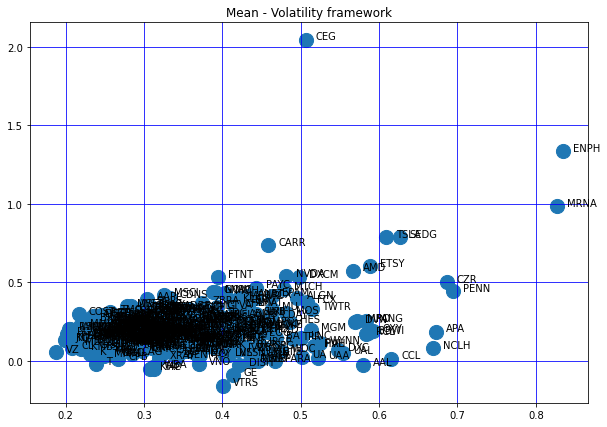

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.grid()

ax.scatter(stats[0],stats[1],marker='o',s=200)
#To start graph at 0,0
#ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=0)
ax.grid( which='major', color='b', linestyle='-')
plt.title("Mean - Volatility framework")

for i, txt in enumerate(assets):
    ax.annotate(txt, (stats[0][i] ,stats[1][i]), xytext=(10,0), textcoords='offset points')

# Optimal portfolio with optimization

##### Our portfolio

In [14]:
initial_inv = 100000

In [15]:
mean_returns = data_returns.mean()
cov_matrix = data_returns.cov()
assets_num = len(assets)
trading_days = len(data)

In [16]:
risk_free_rate = 0.0027

###### Individual portfolio performance given weights

In [17]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

###### Max sharpe

In [18]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

###### Max return

In [19]:
mrp_arg = stats[1].argmax()
mrp = np.array([stats[0][mrp_arg],stats[1][mrp_arg]])

###### Min stdev

In [20]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

###### Efficient frontier

In [21]:
def efficient_return(mean_returns, cov_matrix, target):
    
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target}, 
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} #Sum of weights equal to 1
                  )
    
    bounds = tuple((0.0,1.0) for asset in range(num_assets))
    
    
    result = sco.minimize(portfolio_volatility, #fonction a minimize, compute and return stdev given weights
                          num_assets*[1./num_assets,], #Initial guess, naive portfolio, 1/num_assets
                          args=args, #Other arguments that the function take that we don't optimize
                          method='SLSQP', #method
                          bounds=bounds, #Bonds each weights to a tuple (0,1)
                          constraints=constraints #Explained above
                         )
    
    
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

# Display final efficient frontier

In [22]:
max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=assets,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T
max_sharpe_allocation = max_sharpe_allocation.loc[:, (max_sharpe_allocation != 0).any(axis=0)]
max_sharpe_assets = list(max_sharpe_allocation.columns)

min_vol = min_variance(mean_returns, cov_matrix)
sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
min_vol_allocation = pd.DataFrame(min_vol.x,index=assets,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T
min_vol_allocation = min_vol_allocation.loc[:, (min_vol_allocation != 0).any(axis=0)]

an_vol = np.std(data_returns) * np.sqrt(252)
an_rt = mean_returns * 252

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.94
Annualised Volatility: 0.18


            ALL   AMZN  CHRW  CARR    CEG  EPAM    NEM   TER   TSN  ZION
allocation  0.8  18.39  3.64  4.14  36.84  8.45  12.05  3.28  9.21   3.2
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.34
Annualised Volatility: 0.12


            AMZN   AON   BMY  CHRW   CPB  CTXS   CLX    KO    CEG    DG  ...  \
allocation  7.09  2.52  3.06  8.41  3.85  4.16  2.19  2.25  10.25  0.09  ...   

             NEM  NLOK   OGN  PSA   SJM   TSN    VZ  VTRS   WMT  ZION  
allocation  9.86  2.74  2.52  0.1  2.78  5.42  6.86  1.32  0.97  0.73  

[1 rows x 27 columns]
--------------------------------------------------------------------------------


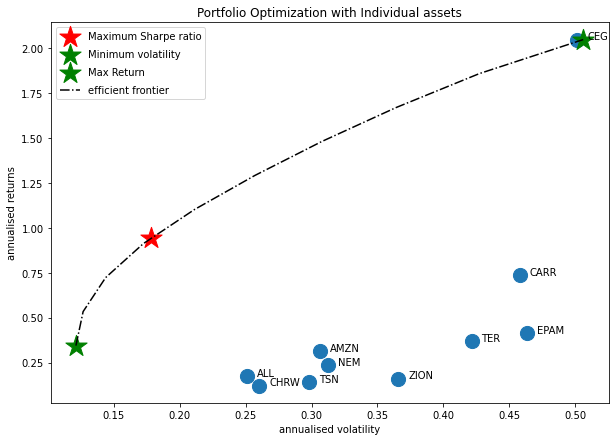

In [23]:
print ("-"*80)
print ("Maximum Sharpe Ratio Portfolio Allocation\n")
print ("Annualised Return:", round(rp,2))
print ("Annualised Volatility:", round(sdp,2))
print ("\n")
print (max_sharpe_allocation)
print ("-"*80)
print ("Minimum Volatility Portfolio Allocation\n")
print ("Annualised Return:", round(rp_min,2))
print ("Annualised Volatility:", round(sdp_min,2))
print ("\n")
print (min_vol_allocation)
print ("-"*80)


fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(an_vol[max_sharpe_assets],an_rt[max_sharpe_assets],marker='o',s=200)

for i, txt in enumerate(max_sharpe_assets):
    ax.annotate(txt, (an_vol[max_sharpe_assets][i],an_rt[max_sharpe_assets][i]), xytext=(10,0), textcoords='offset points')

ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
#ax.scatter(actual_portfolio[0], actual_portfolio[1] , marker='*',color='y',s=500, label='Actual portfolio')
ax.scatter(mrp[0], mrp[1] , marker='*',color='g',s=500, label='Max Return')

target = np.linspace(rp_min, mrp[1], 10)
efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)

ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
ax.set_title('Portfolio Optimization with Individual assets')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
ax.legend(labelspacing=0.8)

Text(0.5, 1.0, 'Correlation')

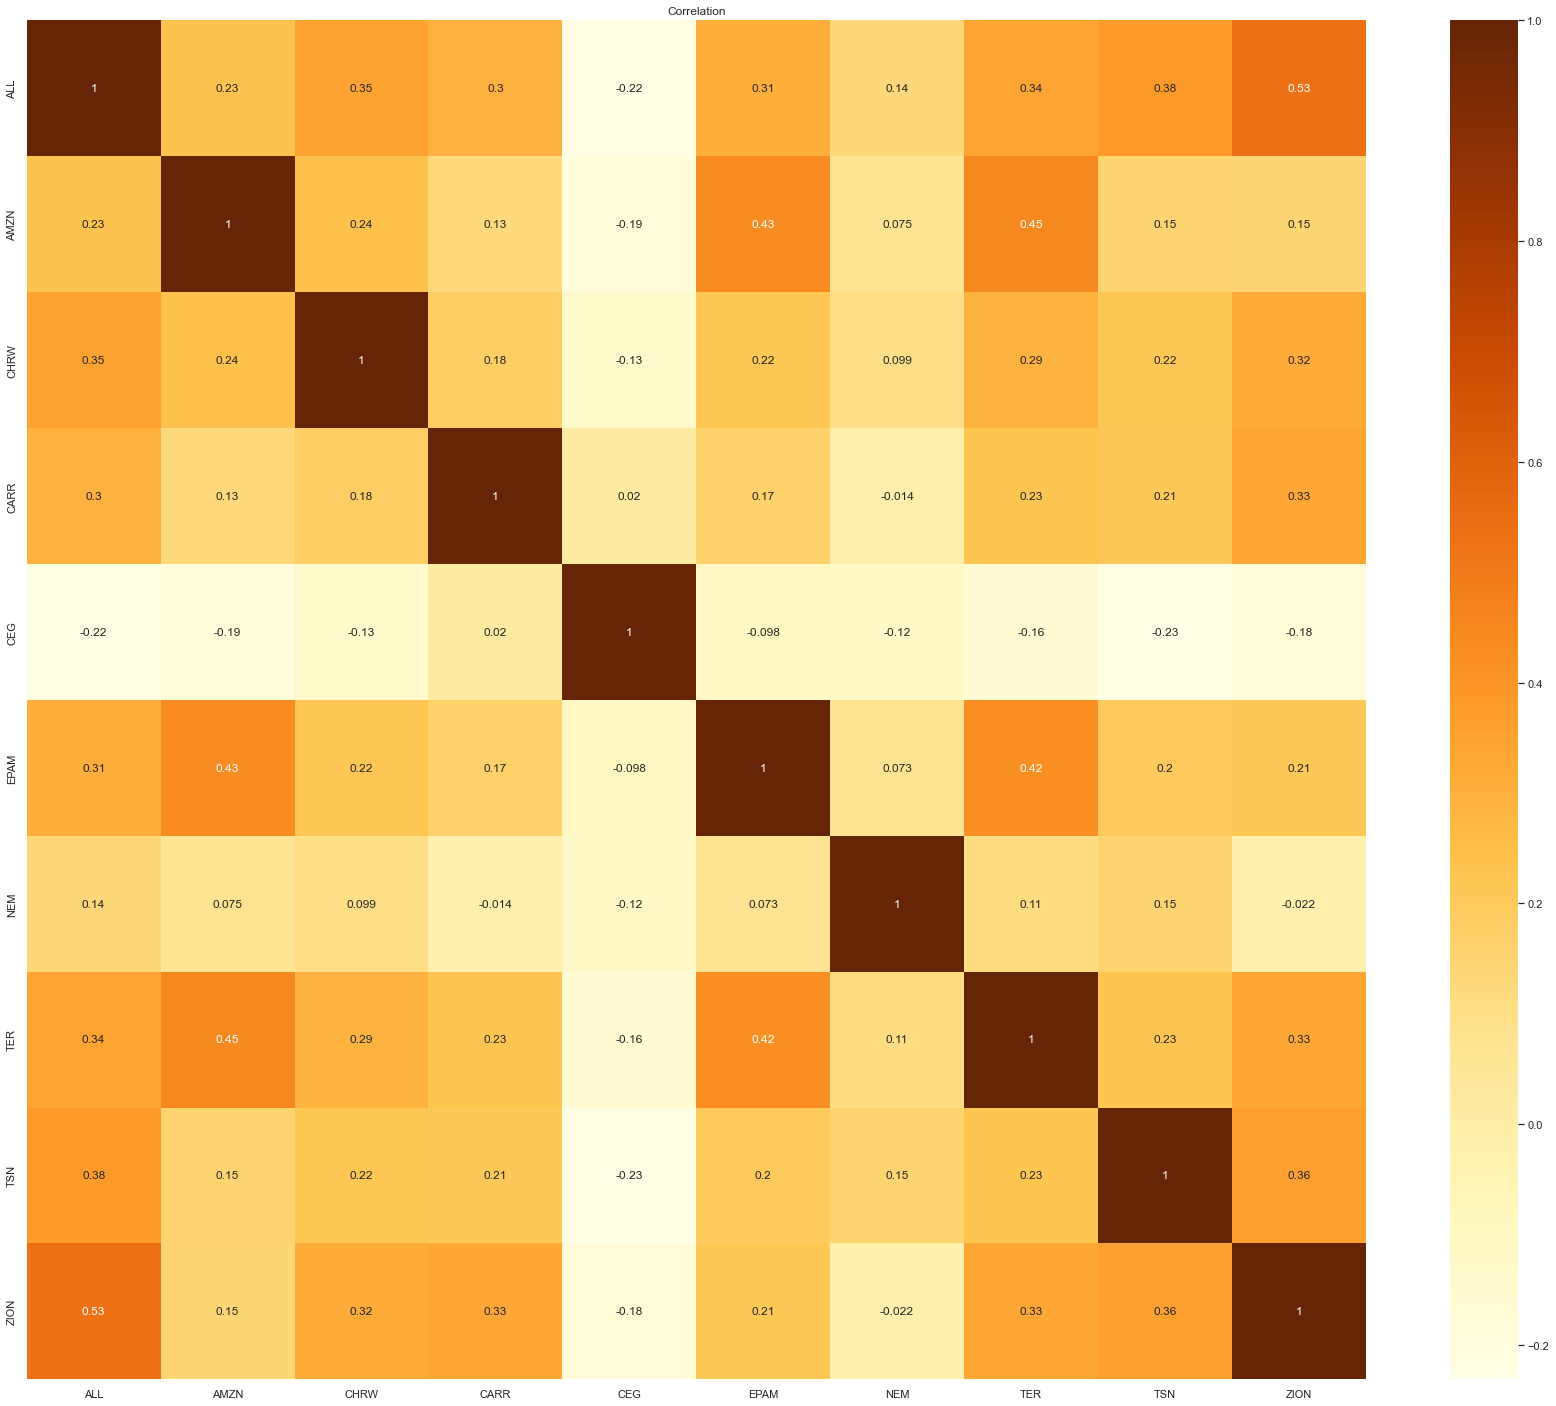

In [24]:
sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(data_returns[max_sharpe_allocation.columns].corr().round(3),annot=True,cmap='YlOrBr').set_title('Correlation')

In [25]:
capital = 100000

In [26]:
alloc = pd.DataFrame(max_sharpe_allocation.T)
alloc = alloc.replace(0,np.nan).dropna(axis=1,how="all")
alloc = alloc.dropna()
alloc = alloc.sort_index()
alloc = alloc.reset_index()


for index, row in alloc.iterrows():
    if row['allocation'] < 0:
        alloc.drop(index, inplace=True)

alloc['alloc_pct'] = alloc.allocation / alloc.allocation.sum()
alloc['alloc_pct'] = alloc['alloc_pct']
alloc['port_pct'] = alloc.alloc_pct *1


price = []
for index, row in alloc.iterrows():
    #print(row["index"],data[row["index"]].iloc[-1])
    price.append(data[row["index"]].iloc[-1])
alloc["price"] = price


alloc["p/u"] = (alloc["port_pct"] * capital) / alloc["price"]
alloc['date'] = data.index[-1]
alloc

,index,allocation,alloc_pct,port_pct,price,p/u,date
0,ALL,0.80,0.0080,0.0080,141.929993,5.636582,2022-04-08
1,AMZN,18.39,0.1839,0.1839,3089.209961,5.952978,2022-04-08
2,CARR,4.14,0.0414,0.0414,43.380001,95.435682,2022-04-08
3,CEG,36.84,0.3684,0.3684,64.019997,575.445204,2022-04-08
4,CHRW,3.64,0.0364,0.0364,102.040001,35.672285,2022-04-08
5,EPAM,8.45,0.0845,0.0845,308.690002,27.373740,2022-04-08
6,NEM,12.05,0.1205,0.1205,82.120003,146.736478,2022-04-08
7,TER,3.28,0.0328,0.0328,108.660004,30.185900,2022-04-08
8,TSN,9.21,0.0921,0.0921,92.440002,99.632191,2022-04-08
9,ZION,3.20,0.0320,0.0320,63.889999,50.086086,2022-04-08


# Beta

In [27]:
port_ret = data_returns[max_sharpe_assets].mul(max_sharpe_allocation.values/100, axis=1).sum(axis = 1)
port_ret = pd.DataFrame(port_ret)

In [28]:
bench = ImportDataClose(["SPY"], start, end,"1d")
bench = bench[0]
bench_ret = bench.pct_change()
bench_ret = bench_ret.dropna()

100% |########################################################################|


In [29]:
port_ret = np.array(port_ret).reshape(-1, 1)
bench_ret = np.array(bench_ret)
port_ret = port_ret*252
bench_ret = bench_ret *252
#print(port_ret.shape)
#print(bench_ret.shape)

In [30]:
print(OLS(port_ret,bench_ret).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              2420.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                   3.12e-301
Time:                        16:04:39   Log-Likelihood:                         -2099.7
No. Observations:                1326   AIC:                                      4201.
Df Residuals:                    1325   BIC:                                      4206.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
model = LinearRegression().fit(bench_ret,port_ret)

In [32]:
print('Portfolio Beta = ', np.round(model.coef_,4),", is the volativity of the portfolio compared to the benchmark")
print('Portfolio Alpha = ', np.round(model.intercept_,4),", is the annualized excess return of the portfolio")

Portfolio Beta =  [[0.5263]] , is the volativity of the portfolio compared to the benchmark
Portfolio Alpha =  [0.1149] , is the annualized excess return of the portfolio


C:\Users\pierre\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


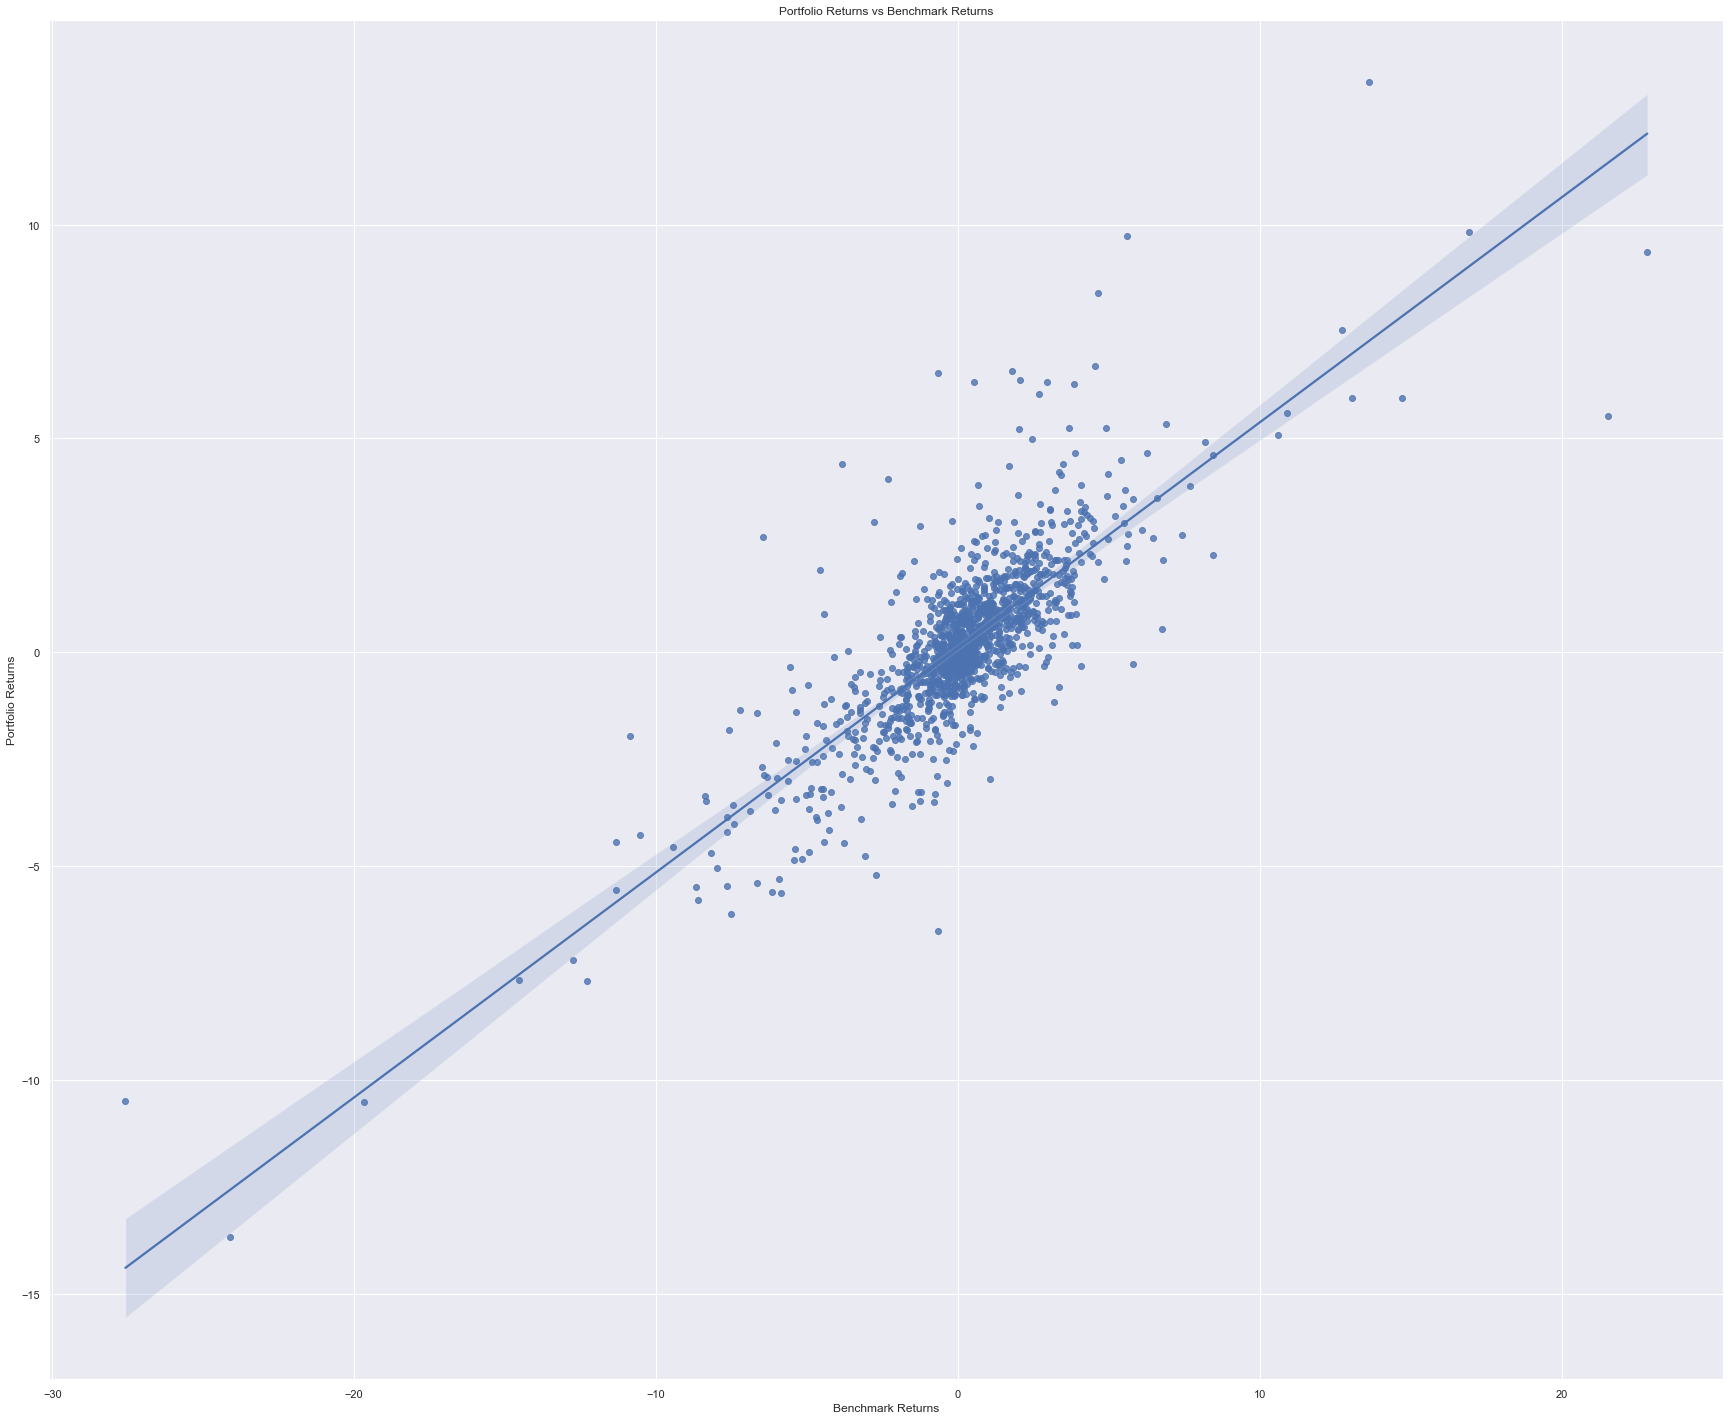

In [33]:
sns.regplot(bench_ret,port_ret)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

# Value at risk

In [34]:
import scipy.stats as stats

norm_test = stats.normaltest(data_returns)[1]
normal, non_normal = 0,0
for i in range(assets_num):
    if norm_test[i] < 0.05:
        #print(assets[i], "follow a normal distribution : True")
        normal = normal+1
    else:
        #print(assets[i], "follow a normal distribution : False")
        non_normal = non_normal+1
print("normal :",normal,"/", "non_normal =",non_normal)

normal : 491 / non_normal = 11


In [35]:
number_sims = 10000
daily_returns = np.random.normal(rp/252, sdp/np.sqrt(252), number_sims)

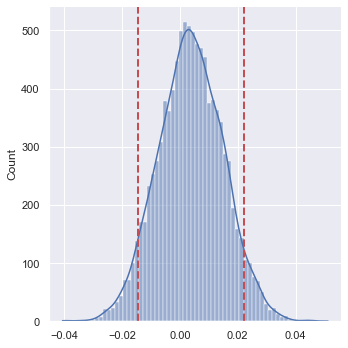

In [36]:
sns.displot(daily_returns, kde=True)
plt.axvline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(daily_returns,95), color='r', linestyle='dashed', linewidth=2)


In [37]:
print('Amount required to cover minimum losses for one day is %' , 
      round(100 * - np.percentile(daily_returns,5),2))

Amount required to cover minimum losses for one day is % 1.45
